### Importing packages and Loading the knowledge graph

In [1]:
from rdflib import Namespace
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('graph.pkl', 'rb') as f:
    g = pickle.load(f)


# Define the ARXIV namespace
ARXIV = Namespace("http://arxiv.org/")

In [2]:
def count_connections(graph):
    total_connections = 0
    for s, p, o in graph:
        # calculate number of connections by counting predicates
        connections = len(list(graph.predicates(subject=s, object=o)))
        total_connections += connections
    return total_connections

total_connections = count_connections(g)
print(f"The total number of connections in the graph is {total_connections}")

The total number of connections in the graph is 1222908


In [3]:
def check_citation_connections(graph):
    citation_predicate = ARXIV.cites  # replace with your citation predicate URI
    total_citations = 0
    for s, p, o in graph:
        # calculate number of citations by counting citation predicates
        if p == citation_predicate:
            total_citations += 1
    return total_citations

total_citations = check_citation_connections(g)
print(f"The total number of citation connections in the graph is {total_citations}")

The total number of citation connections in the graph is 5745


In [4]:
import pandas as pd
from datetime import datetime


# Function to parse and get year from date
def get_year(date_string):
    date_object = datetime.strptime(date_string, "%Y-%m-%d")
    return date_object.year

# SPARQL queries to get the data
def get_data():
    dataframe = {
        'title': [],
        'year': [],
        'abstract': []
    }
    qres = g.query(
        """
        SELECT ?title ?date ?abstract
           WHERE {
              ?paper a <http://arxiv.org/Paper> .
              ?paper <http://arxiv.org/title> ?title .
              ?paper <http://arxiv.org/date> ?date .
              ?paper <http://arxiv.org/abstract> ?abstract .
           }
        """
    )

    for row in qres:
        dataframe['title'].append(str(row[0]))
        dataframe['year'].append(get_year(str(row[1])))
        dataframe['abstract'].append(str(row[2]))

    return dataframe

# Call the function to get the data
dataframe = get_data()

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(dataframe)
df.head()

,title,year,abstract
0,Microfluidic control over topological states i...,2020,"Compared to isotropic liquids, orientational..."
1,Sculpting stable structures in pure liquids,2020,Pure liquids in thermodynamic equilibrium ar...
2,Locality-Sensitive Hashing for Efficient Web A...,2020,Web application security has become a major ...
3,Gravitational wave and electroweak baryogenesi...,2022,We study stochastic gravitational wave produ...
4,ARA : Aggregated RAPPOR and Analysis for Centr...,2020,Differential privacy(DP) has now become a st...


In [5]:
print(f"Samples: {df.shape[0]}\nFeatures: {df.shape[1]}")

Samples: 795
Features: 3


In [6]:
any(df.isna().sum())

False

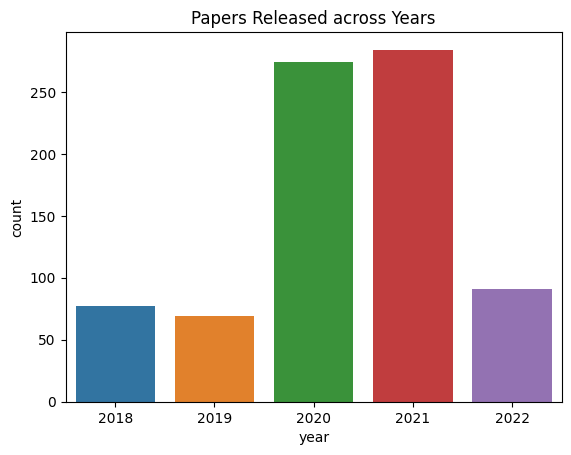

In [7]:
sns.countplot(data=df, x='year')
plt.title("Papers Released across Years")
plt.show()

In [8]:
df['length'] = df['abstract'].str.len()

def word_count(x):
    return len(x.split())

df['word_count'] = df['abstract'].apply(word_count)
df.head()

,title,year,abstract,length,word_count
0,Microfluidic control over topological states i...,2020,"Compared to isotropic liquids, orientational...",1064,149
1,Sculpting stable structures in pure liquids,2020,Pure liquids in thermodynamic equilibrium ar...,767,101
2,Locality-Sensitive Hashing for Efficient Web A...,2020,Web application security has become a major ...,1006,151
3,Gravitational wave and electroweak baryogenesi...,2022,We study stochastic gravitational wave produ...,583,78
4,ARA : Aggregated RAPPOR and Analysis for Centr...,2020,Differential privacy(DP) has now become a st...,908,148


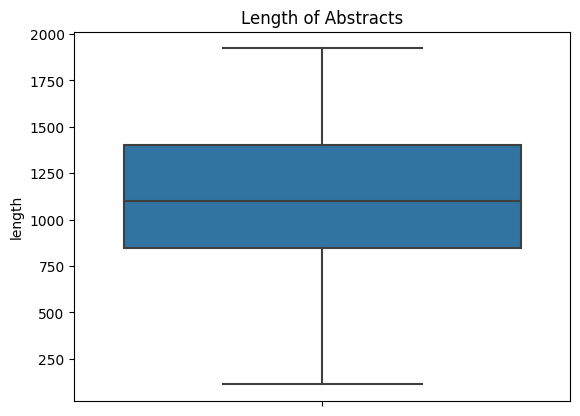

In [9]:
sns.boxplot(data=df, y='length')
plt.title("Length of Abstracts")
plt.show()

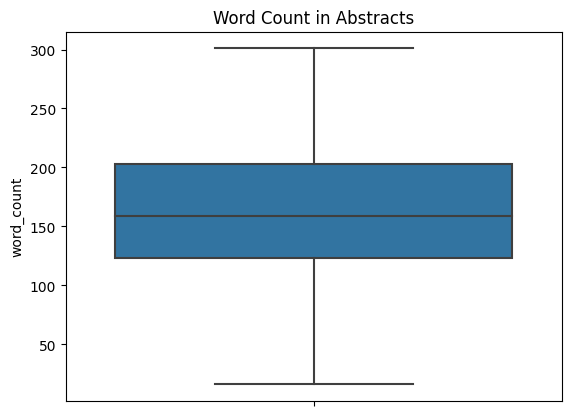

In [10]:
sns.boxplot(data=df, y='word_count')
plt.title("Word Count in Abstracts")
plt.show()

In [11]:
print(f"Mean of Word Count: {df['word_count'].mean():.2f}\nMedian of Word Count: {df['word_count'].median()}")

Mean of Word Count: 163.76
Median of Word Count: 159.0


Compute the number of instances of each discipline

In [12]:
discipline_counts = {}

for s, p, o in g:
    if p == ARXIV.discipline:
        if str(o) in discipline_counts:
            discipline_counts[str(o)] += 1
        else:
            discipline_counts[str(o)] = 1

# Print the disciplines with the most instances
for discipline, count in sorted(discipline_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'Discipline: {discipline}, Paper Count: {count}')


Discipline: Physics, Paper Count: 445
Discipline: Computer Science, Paper Count: 163
Discipline: Mathematics, Paper Count: 106
Discipline: Statistics, Paper Count: 43
Discipline: Quantitative Biology, Paper Count: 18
Discipline: Electrical Engineering and Systems Science, Paper Count: 16
Discipline: Quantitative Finance, Paper Count: 4


Compute the number of instances of each discipline

In [13]:
title = {}

for s, p, o in g:
    if p == ARXIV.discipline:
        if str(o) in discipline_counts:
            discipline_counts[str(o)] += 1
        else:
            discipline_counts[str(o)] = 1

# Print the disciplines with the most instances
for discipline, count in sorted(discipline_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'Discipline: {discipline}, Paper Count: {count}')

Discipline: Physics, Paper Count: 890
Discipline: Computer Science, Paper Count: 326
Discipline: Mathematics, Paper Count: 212
Discipline: Statistics, Paper Count: 86
Discipline: Quantitative Biology, Paper Count: 36
Discipline: Electrical Engineering and Systems Science, Paper Count: 32
Discipline: Quantitative Finance, Paper Count: 8


Compute the number of instances of each author

In [14]:
author_counts = {}

for s, p, o in g:
    if p == ARXIV.Author:
        # Assuming the authors are separated by commas
        authors = str(o).split(',')
        for author in authors:
            author = author.strip()  # Remove leading/trailing whitespace
            if author in author_counts:
                author_counts[author] += 1
            else:
                author_counts[author] = 1

# Print the authors with the most papers
for author, count in sorted(author_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'Author: {author}, Paper Count: {count}')


Author: Sansit Patnaik, Paper Count: 7
Author: Sai Sidhardh, Paper Count: 6
Author: Kishor D. Kucche, Paper Count: 6
Author: ATLAS Collaboration, Paper Count: 5
Author: Fabio Semperlotti, Paper Count: 5
Author: Siham Aouissi, Paper Count: 5
Author: Shihao Song, Paper Count: 4
Author: Anup Das, Paper Count: 4
Author: Nagarajan Kandasamy, Paper Count: 4
Author: Markus Sch\"oberl, Paper Count: 4
Author: Shrikant Utagi, Paper Count: 4
Author: Xin Wang, Paper Count: 4
Author: Ashwini D. Mali, Paper Count: 4
Author: Narsireddy Anugu, Paper Count: 4
Author: Niranjan Saikumar, Paper Count: 4
Author: Mohamed Talbi, Paper Count: 4
Author: Snehasish Bhattacharjee, Paper Count: 4
Author: Earl T. Campbell, Paper Count: 4
Author: Zhi-Gang Wang, Paper Count: 4
Author: Jun-Zhang Wang, Paper Count: 3
Author: Xiang Liu and Takayuki Matsuki, Paper Count: 3
Author: Ahmad Sheykhi, Paper Count: 3
Author: Conrad Gst\"ottner, Paper Count: 3
Author: Bernd Kolar, Paper Count: 3
Author: John H. Selby, Paper Coun

Compute the number of instances of each citeid

In [15]:
cites_counts = {}

for s, p, o in g:
    if p == ARXIV.cites:
        cites = str(o)
        if cites in cites_counts:
            cites_counts[cites] += 1
        else:
            cites_counts[cites] = 1

# Print the citeids with the most instances
for citeid, count in sorted(cites_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'Cites: {citeid}, Count: {count}')


Cites: http://arxiv.org/1807.06209, Count: 13
Cites: http://arxiv.org/1207.7214, Count: 6
Cites: http://arxiv.org/1207.7235, Count: 6
Cites: http://arxiv.org/1502.01589, Count: 5
Cites: http://arxiv.org/1603.00464, Count: 5
Cites: http://arxiv.org/1105.4464, Count: 5
Cites: http://arxiv.org/1405.0301, Count: 5
Cites: http://arxiv.org/1412.6980, Count: 5
Cites: http://arxiv.org/hep-th/0601001, Count: 4
Cites: http://arxiv.org/0912.0195, Count: 4
Cites: http://arxiv.org/1411.4028, Count: 4
Cites: http://arxiv.org/1409.2024, Count: 3
Cites: http://arxiv.org/1807.07076, Count: 3
Cites: http://arxiv.org/1603.05234, Count: 3
Cites: http://arxiv.org/hep-ph/0603175, Count: 3
Cites: http://arxiv.org/1604.06444, Count: 3
Cites: http://arxiv.org/1605.07372, Count: 3
Cites: http://arxiv.org/1911.11760, Count: 3
Cites: http://arxiv.org/1809.06655, Count: 3
Cites: http://arxiv.org/1601.08193, Count: 3
Cites: http://arxiv.org/1410.3012, Count: 3
Cites: http://arxiv.org/1610.07922, Count: 3
Cites: htt

To check number of times a keyword is used

In [16]:
# Choose your keyword
keyword = "machine learning"  # replace with your keyword

# Make sure the keyword is in lowercase for case-insensitive search
keyword = keyword.lower()

# Initialize the count
keyword_count = 0

# Iterate over each statement in the graph
for s, p, o in g:
    if p in [ARXIV.title, ARXIV.abstract, ARXIV.body]:
        # Convert the object to lowercase and count the occurrences of the keyword
        keyword_count += str(o).lower().count(keyword)

print(f'The keyword "{keyword}" appears {keyword_count} times.')


The keyword "machine learning" appears 859 times.


To find out the common words found in the title and abstract

In [17]:
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Add specific words to the stop words list
stop_words.update(['also', 'ref', 'cite', 'one', 'two', '1', 'e', 'using', 'figure', 'given', 'new', 'based', 'show', 'results', 'learning'])

# Initialize a Counter object
word_counter = Counter()

# Iterate over each statement in the graph
for s, p, o in g:
    if p in [ARXIV.title, ARXIV.abstract]:
        # Convert the object to lowercase, tokenize it into words using a regular expression,
        # remove stop words, and update the counter
        words = re.findall(r'\b\w+\b', str(o).lower())
        words = [word for word in words if word not in stop_words]
        word_counter.update(words)

# Find the most common words
common_words = word_counter.most_common(10)

for word, count in common_words:
    print(f'Word: {word}, Count: {count}')

Word: quantum, Count: 704
Word: model, Count: 563
Word: data, Count: 404
Word: state, Count: 304
Word: models, Count: 250
Word: system, Count: 246
Word: systems, Count: 242
Word: order, Count: 238
Word: 2, Count: 226
Word: energy, Count: 226


Nodes which have citation connections

In [18]:
def check_citation_connections(graph):
    for s, p, o in graph:
        # calculate number of citation connections by checking if the predicate is the citation predicate
        if p == ARXIV.cites:
            print(f'Node {str(s)} has citation connection')

check_citation_connections(g)


Node http://arxiv.org/2011.13660 has citation connection
Node http://arxiv.org/2003.05150 has citation connection
Node http://arxiv.org/2012.02092 has citation connection
Node http://arxiv.org/2011.05889 has citation connection
Node http://arxiv.org/2003.13703 has citation connection
Node http://arxiv.org/2007.10686 has citation connection
Node http://arxiv.org/2007.10686 has citation connection
Node http://arxiv.org/2003.05150 has citation connection
Node http://arxiv.org/2011.12331 has citation connection
Node http://arxiv.org/1805.05212 has citation connection
Node http://arxiv.org/2005.11889 has citation connection
Node http://arxiv.org/1812.02144 has citation connection
Node http://arxiv.org/2012.02092 has citation connection
Node http://arxiv.org/2011.05889 has citation connection
Node http://arxiv.org/2009.00516 has citation connection
Node http://arxiv.org/2003.13703 has citation connection
Node http://arxiv.org/2009.00516 has citation connection
Node http://arxiv.org/2008.1151